# Making a correction

## Introduction


Pre-compensate designs to counteract fabrication effects. This example shows how to correct the same 500 nm target structure, automatically adjusting the layout so the fabricated result matches your target specifications.

Import the library:

In [1]:
import prefab as pf

## Loading a device


Create your target device - the structure you want to fabricate. The `Device` class represents photonic geometries in PreFab - load from GDS, images, or numpy arrays with binary pixel values (0 or 1).

<Axes: xlabel='x (nm)', ylabel='y (nm)'>

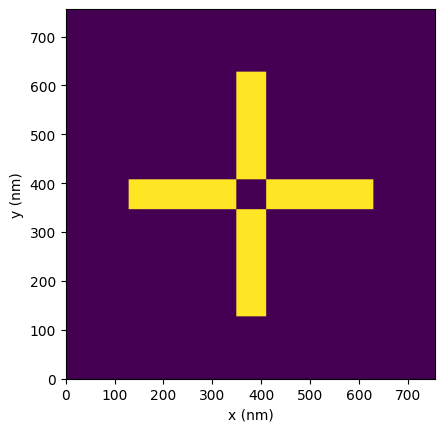

In [2]:
device = pf.shapes.target(width=500, arm_width=60)
device.plot(show_buffer=False)

## Correcting a device


Run a correction using a specific fabrication model. [Reach out](mailto:hi@prefabphotonics.com) if you'd like a model trained for your fabrication process.

> **Note:** Initial prediction/correction may take longer due to server startup and model loading. Subsequent predictions should be quicker.


<Axes: xlabel='x (nm)', ylabel='y (nm)'>

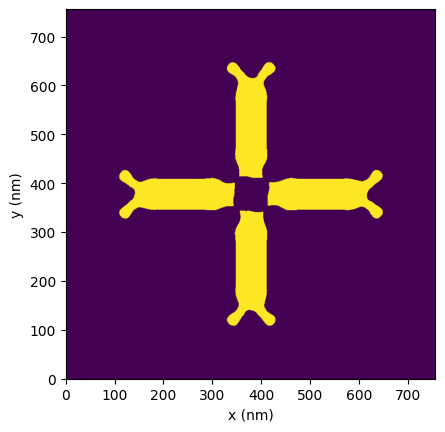

In [3]:
MODEL_NAME = "Generic_SOI"
correction = device.correct(model=pf.models[MODEL_NAME])
correction.plot(show_buffer=False)

The correction model pre-distorts the layout to compensate for fabrication effects - adding material where erosion is expected, removing it where dilation occurs.

<Axes: xlabel='x (nm)', ylabel='y (nm)'>

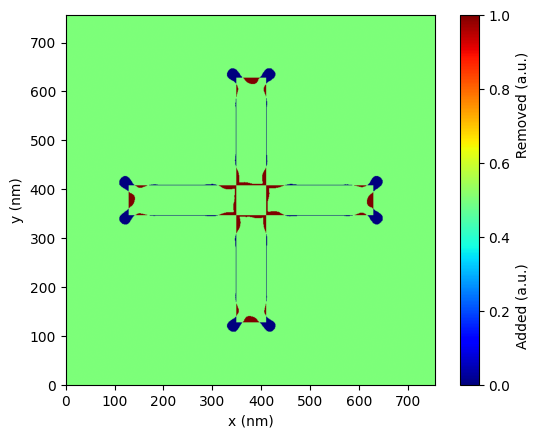

In [4]:
correction.plot_compare(ref_device=device, show_buffer=False)

## Making a prediction of the correction


Verify the correction by predicting the fabrication outcome. The corrected design shows sharper corners and better-resolved features. The IoU score improves from **83% to 95%** - meaning the fabricated device will match your target specifications far more closely.

<Axes: xlabel='x (nm)', ylabel='y (nm)'>

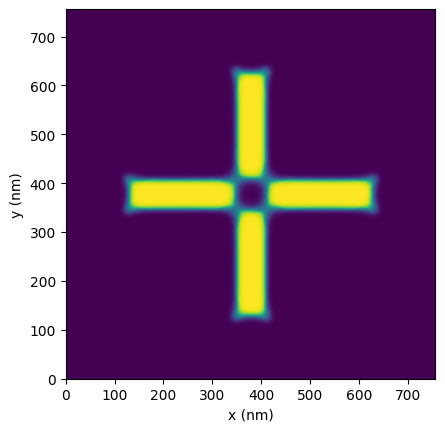

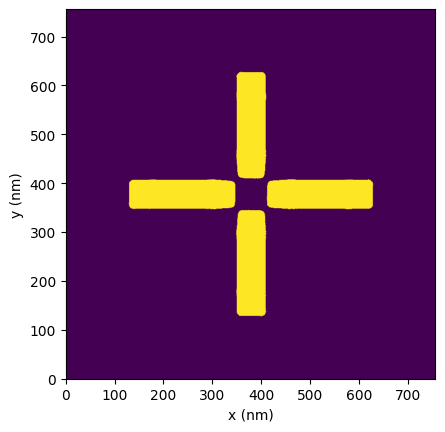

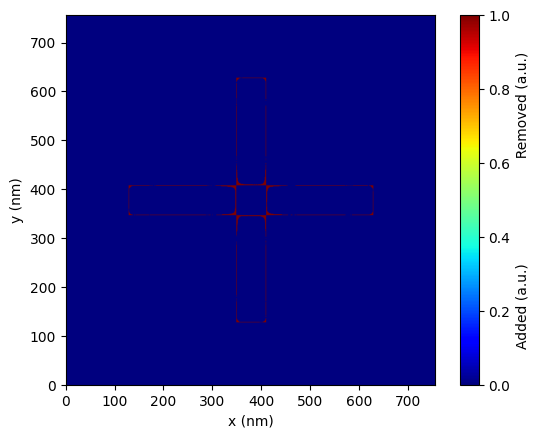

In [5]:
outcome = correction.predict(model=pf.models[MODEL_NAME])
outcome_bin = outcome.binarize()

outcome.plot(show_buffer=False)
outcome_bin.plot(show_buffer=False)
outcome_bin.plot_compare(ref_device=device, show_buffer=False)

In [6]:
print(f"Corrected IoU: {pf.compare.intersection_over_union(device, outcome_bin):.2f}")

Corrected IoU: 0.95


While perfect restoration isn't always achievable due to physical constraints, correction consistently recovers significant performance. Stay updated with the latest models as we continue improving accuracy.